0.006331250071525574
106.93243761416102
179.9223025266899
179.9223025266899


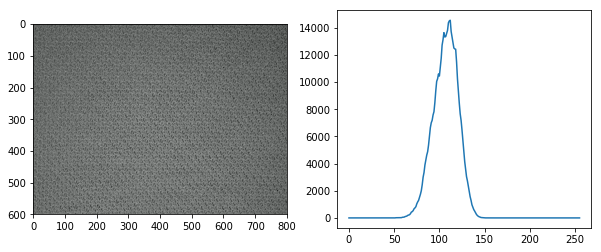

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

def RGB_model( f, channel ):
    if channel == 1:   # Red
        return f[:,:,2]
    elif channel == 2: # Green
        return f[:,:,1]
    else:   # Blue
        return f[:,:,0]
  
def moment(prob,nth):
    m=0
    size=256
    for i in range(size):
        m = m + i*prob[i]
    print(m)
    
    mu = 0.0
    for j in range(size):
        mu = mu + ((j-m)**nth)*prob[j]
    print(mu)
    return mu
    
def histogram( f , nth):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)          
    plt.imshow(f,cmap=plt.cm.gray)
    plt.subplot(1,2,2) 
    hist = cv2.calcHist( [f], [0], None, [256], [0,256] )
    size = 256
    prob = np.zeros(size,dtype = 'float' )
    plt.plot( hist )
    sum=0
    for i in range(255):
        sum=sum+hist[i]
    for i in range(255):
        prob[i]=hist[i]/sum        
    print(prob[130])
    moment2 = moment(prob,nth)

    #plt.xlabel( "Intensity" )
    #plt.ylabel( "#Intensities" )
    #plt.show( )
    return moment2

def main( ):
    img = cv2.imread( "temp-b-7_10282020155242 001.jpg", -1 )
    moment2 = histogram(img,2)
    print(moment2)
    
    R = RGB_model( img, 1)
    nr, nc = R.shape[:2]
    bsize=50
    times_row=int(nr/bsize)
    times_col=int(nc/bsize)
    
    block = np.zeros([bsize,bsize,times_row*times_col],dtype = 'uint8' )
#    for i in range(bsize):
#        for j in range(bsize):
#            row = math.floor(i/bsize)
#            col = math.floor(j/bsize)
#            block[i,j,row+col*times_row]=R[i,j]
#    for row in range(times_row):
#        for col in range(times_col):
#            m1 = histogram( block[:,:,row+col*times_row] )
    

main( )